<a href="https://colab.research.google.com/github/anadiedrichs/time-series-analysis/blob/master/proyecto_forma_de_onda_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio #1 Proyecto forma de onda - Unidad análisis de series temporales - Teleinformática IoT - 2019

**Docente: Ing. Ana Laura Diedrichs**

Consultas: lunes 19 hs en sala consulta de sistemas.

Contacto por otros horarios de consulta o dudas: 
* Email: ana.diedrichs@frm.utn.edu.ar
* Telegram  @anadiedrichs

## Objetivos del laboratorio:

* Analizar una serie temporal para un problema específico
* Fomentar el trabajo en clase, discusión y aportes de soluciones entre los participantes
* Ser una entrada en calor o introducción del uso del entorno colab.research.google.com y librerías Python como pandas

## Pre-requisitos o pre-condiciones
* Tener una cuenta google (gmail)
* Tener instalado el navegador google chrome 
* Contar con conectividad a Internet

## Entrega y uso del laboratorio

**USO**

* Antes que cualquier cosa, **cree una copia de este notebook: Click en *File*, luego *Save a Copy in Drive***
* Renombre el archivo con el siguiente formato: APELLIDO_NOMBRE_LEGAJO_titulonotebook.ipynb 
Ejemplo: DIEDRICHS_ANA_99999_proyecto_forma_de_onda_2019.ipynb
* Use el notebook, complete las actividades y consignas que se elija. 
* Este laboratorio es una actividad individual.
* Se fomenta el intercambio de opiniones en clase y exposición.

**ENTREGA**

* Una vez finalizado el laboratorio, complete [el formulario de entrega](https://forms.gle/zUnbfN79YEEeJFz7A) indicando
 * Apellido
 * Nombre
 * Nro Legajo
 * Carrera
 * Actividad (cuál laboratorio o actividad)
 * link de su notebook. El mismo se obtiene si realiza click en *Share* (esquina superior derecha) y luego en *Get shareable link* 
 
 
 No se aceptarán otras formas de entrega distintas a la mencionada.
 
 Fecha límite de entrega: 17 de octubre de 2019.

## Intro

Durante el año 2018 era la primera vez que se dictaba esta unidad en la materia. En la primer clase realicé la pregunta sobre si les interesaba algunos datos en particular para analizar o algún dataset. Un alumno nos acercó su inquietud y compartió el dataset que es el que vamos a usar en este laboratorio.

El dataset contiene mediciones de una toma de corriente trifásica.

Vea más sobre corrienta alterna en https://es.wikipedia.org/wiki/Corriente_alterna

Notará que las señales son senoidales.



## Carga del dataset

### por pasos: chusmeando con la CLI primero, luego importar con pandas

In [0]:
!wget  https://github.com/anadiedrichs/time-series-analysis/raw/master/datasets/forma_de_onda/forma_de_onda.csv

--2019-10-10 16:03:40--  https://github.com/anadiedrichs/time-series-analysis/raw/master/datasets/forma_de_onda/forma_de_onda.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anadiedrichs/time-series-analysis/master/datasets/forma_de_onda/forma_de_onda.csv [following]
--2019-10-10 16:03:40--  https://raw.githubusercontent.com/anadiedrichs/time-series-analysis/master/datasets/forma_de_onda/forma_de_onda.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48250410 (46M) [text/plain]
Saving to: ‘forma_de_onda.csv.1’

forma_de_onda.csv.1 100%[===================>]  46.01M   166MB/s    in 0.3s    

201

In [0]:
!ls -lh

total 140M
-rw-r--r-- 1 root root  47M Oct 10 15:17 forma_de_onda.csv
-rw-r--r-- 1 root root  47M Oct 10 16:03 forma_de_onda.csv.1
-rw-r--r-- 1 root root  48M Oct 10 15:11 forma_de_onda.txt
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data


Notamos que forma_de_onda.csv pesa unos 47 Megabytes.
Chusmeo las primeras líneas

In [0]:
!head forma_de_onda.csv

"Fecha","Hora","AN(V)","A(A)","BN(V)","B(A)","CN(V)","C(A)","NG(V)","N(A)"
09/20/18,"18:38:36.120",313.6751,-154.1138,-66.1186,78.2013,-240.5648,64.4684,0,42.3431
09/20/18,"18:38:36.120",311.6035,-144.1956,-42.252,71.3348,-258.9934,68.6646,-0.0863,28.2288
09/20/18,"18:38:36.121",305.216,-128.1738,-16.2275,64.0869,-275.9115,70.5719,-0.2158,6.8665
09/20/18,"18:38:36.121",291.7506,-111.7706,8.5885,58.7463,-289.3769,72.4792,-0.2158,-17.5476
09/20/18,"18:38:36.121",273.8831,-102.9968,31.8509,54.5502,-299.6054,79.3457,-0.1295,-39.2914
09/20/18,"18:38:36.121",254.6344,-99.9451,54.8111,47.3022,-305.6908,90.7898,-0.0432,-51.1169
09/20/18,"18:38:36.122",235.4721,-98.8007,79.3682,36.2396,-309.1434,106.8115,-0.0863,-57.9834
09/20/18,"18:38:36.122",215.0582,-94.986,105.6085,23.6511,-311.4308,122.8333,-0.259,-68.6646
09/20/18,"18:38:36.122",191.4074,-85.8307,132.3236,12.97,-312.9414,134.6588,-0.3884,-85.8307


Observe como están separados los campos de información (por coma), el formato de la fecha y la hora.


Importamos usando la funcion read_csv, puede demorar un poco en ejecutarse.

In [0]:
import pandas as pd
from pandas import Series
data = pd.read_csv('forma_de_onda.csv',header=0, parse_dates=[0],squeeze=True) #index_col=0,


index_col es 0 : toma la primer columna como indice por defecto 


header es 0, la primer fila es usada como cabecera


parse_dates es True, intenta convertir los tipos de datos a tipo DateTime

La option squeeze=True regresa tipo Series

Mostramos las primeras 10 líneas del dataset

In [0]:
data.head(10) 

,Fecha,Hora,AN(V),A(A),BN(V),B(A),CN(V),C(A),NG(V),N(A)
0,2018-09-20,18:38:36.120,313.6751,-154.1138,-66.1186,78.2013,-240.5648,64.4684,0.0000,42.3431
1,2018-09-20,18:38:36.120,311.6035,-144.1956,-42.2520,71.3348,-258.9934,68.6646,-0.0863,28.2288
2,2018-09-20,18:38:36.121,305.2160,-128.1738,-16.2275,64.0869,-275.9115,70.5719,-0.2158,6.8665
3,2018-09-20,18:38:36.121,291.7506,-111.7706,8.5885,58.7463,-289.3769,72.4792,-0.2158,-17.5476
4,2018-09-20,18:38:36.121,273.8831,-102.9968,31.8509,54.5502,-299.6054,79.3457,-0.1295,-39.2914
5,2018-09-20,18:38:36.121,254.6344,-99.9451,54.8111,47.3022,-305.6908,90.7898,-0.0432,-51.1169
6,2018-09-20,18:38:36.122,235.4721,-98.8007,79.3682,36.2396,-309.1434,106.8115,-0.0863,-57.9834
7,2018-09-20,18:38:36.122,215.0582,-94.9860,105.6085,23.6511,-311.4308,122.8333,-0.2590,-68.6646
8,2018-09-20,18:38:36.122,191.4074,-85.8307,132.3236,12.9700,-312.9414,134.6588,-0.3884,-85.8307
9,2018-09-20,18:38:36.122,164.5629,-73.6237,157.8733,4.1962,-313.9340,141.1438,-0.3453,-104.1412


In [0]:
type(data) #el tipo de variable que es data, es un DataFrame

pandas.core.frame.DataFrame

## Accediendo a pedacitos del dataset

Veo desde la fila 1 a la 20, las columnas 2 a la 7

In [0]:
data.iloc[1:20,2:7]

,AN(V),A(A),BN(V),B(A),CN(V)
1,311.6035,-144.1956,-42.2520,71.3348,-258.9934
2,305.2160,-128.1738,-16.2275,64.0869,-275.9115
3,291.7506,-111.7706,8.5885,58.7463,-289.3769
4,273.8831,-102.9968,31.8509,54.5502,-299.6054
5,254.6344,-99.9451,54.8111,47.3022,-305.6908
6,235.4721,-98.8007,79.3682,36.2396,-309.1434
7,215.0582,-94.9860,105.6085,23.6511,-311.4308
8,191.4074,-85.8307,132.3236,12.9700,-312.9414
9,164.5629,-73.6237,157.8733,4.1962,-313.9340
10,136.0784,-61.4166,181.3947,-3.4332,-314.3656


Grafico un rango del dataset

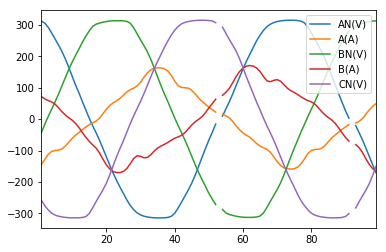

In [0]:
data.iloc[1:100,2:7].plot()

## Propiedades del dataset

Cuántas filas y columnas tiene

In [0]:
data.shape

(524088, 10)

Son las mismas columnas que miramos ejecutando *head*

In [0]:
data.head(10)

,Fecha,Hora,AN(V),A(A),BN(V),B(A),CN(V),C(A),NG(V),N(A)
0,2018-09-20,18:38:36.120,313.6751,-154.1138,-66.1186,78.2013,-240.5648,64.4684,0.0000,42.3431
1,2018-09-20,18:38:36.120,311.6035,-144.1956,-42.2520,71.3348,-258.9934,68.6646,-0.0863,28.2288
2,2018-09-20,18:38:36.121,305.2160,-128.1738,-16.2275,64.0869,-275.9115,70.5719,-0.2158,6.8665
3,2018-09-20,18:38:36.121,291.7506,-111.7706,8.5885,58.7463,-289.3769,72.4792,-0.2158,-17.5476
4,2018-09-20,18:38:36.121,273.8831,-102.9968,31.8509,54.5502,-299.6054,79.3457,-0.1295,-39.2914
5,2018-09-20,18:38:36.121,254.6344,-99.9451,54.8111,47.3022,-305.6908,90.7898,-0.0432,-51.1169
6,2018-09-20,18:38:36.122,235.4721,-98.8007,79.3682,36.2396,-309.1434,106.8115,-0.0863,-57.9834
7,2018-09-20,18:38:36.122,215.0582,-94.9860,105.6085,23.6511,-311.4308,122.8333,-0.2590,-68.6646
8,2018-09-20,18:38:36.122,191.4074,-85.8307,132.3236,12.9700,-312.9414,134.6588,-0.3884,-85.8307
9,2018-09-20,18:38:36.122,164.5629,-73.6237,157.8733,4.1962,-313.9340,141.1438,-0.3453,-104.1412


¿Lo siguiente muestra número de filas o columnas?

In [0]:
data.shape[0]

524088

¿Lo siguiente muestra número de filas o columnas?

In [0]:
data.shape[1]

10

Podemos observar de cada DataFrame algunas características estadísticas usando *describe()*

In [0]:
data.describe()

,AN(V),A(A),BN(V),B(A),CN(V),C(A),NG(V),N(A)
count,517241.000000,517241.000000,517241.000000,517241.000000,517241.000000,517241.000000,517241.000000,517241.000000
mean,0.041821,0.086277,0.076139,0.111673,0.055757,0.038909,-0.027649,0.021303
std,230.014488,102.165137,228.445619,114.830872,230.294228,95.693325,0.332933,67.514958
min,-315.617200,-248.336800,-313.847700,-211.334200,-315.228800,-188.446000,-1.165300,-141.143800
25%,-234.047900,-91.552700,-231.717300,-102.615400,-234.565800,-82.016000,-0.259000,-49.972500
50%,0.086300,-0.381500,0.302100,0.000000,0.388400,0.000000,0.000000,0.000000
75%,234.393100,91.934200,232.192100,102.615400,234.695200,82.397500,0.215800,49.972500
max,315.703500,250.625600,313.977200,212.860100,315.401400,187.301600,0.820000,139.999400


## Valores perdidos

Chusmeamos el dataset nuevamente

In [0]:
data.iloc[50:60,0:5]

,Fecha,Hora,AN(V),A(A),BN(V)
50,2018-09-20,18:38:36.133,-66.8955,38.1470,-236.2921
51,2018-09-20,18:38:36.134,-42.3384,30.1361,-254.5049
52,2018-09-20,18:38:36.134,-15.9686,22.1252,-271.9841
53,NaT,NaN,NaN,NaN,NaN
54,2018-09-20,18:38:36.134,9.3222,14.8773,-287.6937
55,2018-09-20,18:38:36.134,32.6277,10.2997,-298.7423
56,2018-09-20,18:38:36.135,55.2427,3.8147,-303.7055
57,2018-09-20,18:38:36.135,80.4472,-8.0109,-306.7266
58,2018-09-20,18:38:36.135,107.2054,-21.7438,-309.2298
59,2018-09-20,18:38:36.135,133.6615,-33.9508,-311.0856


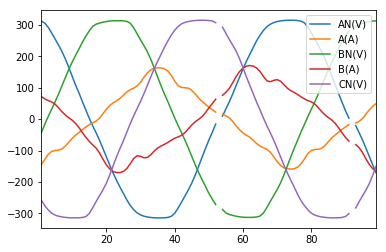

In [0]:
data.iloc[1:100,2:7].plot()

### [Actividad]

Habrá notado que hay valores pedidos en la serie. 

Determine si reconstruye la señal compleando los valores perdidos e indicados como NaN o los ignora. Justifique

SU RESPUESTA AQUI

## [actividad] Intervalos de muestreo

¿Cada cuánto tenemos una medición? ¿Qué nos puede decir sobre el intervalo de muestreo?



**SU RESPUESTA AQUI**



## [actividad] Análisis de la señal

¿Son todas las ondas "perfectamente" senoidales?

¿Por qué cree que alguna no?

**SU RESPUESTA AQUI**

### [actividad] Calcule y grafique la FFT de la señal 

ESCRIBA SUS COMENTARIOS AQUI

¿qué concluye al ver este gráfico?


SU RESPUESTA AQUI